# Project RN 


<div class="alert alert-block alert-danger">  
<h2><center><strong>Importation des librairies necessaires 📕 📗 📘 📙</strong></center></h2>
        
</div>

commencant par l'importation des librairies qu'on aura besoin dans notre projet

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
plt.style.use('ggplot')
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report,confusion_matrix
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import ruptures as rpt
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.cm as cm
from matplotlib import rcParams
from sklearn.naive_bayes import MultinomialNB
from sklearn.base import BaseEstimator
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from nltk.tokenize import RegexpTokenizer
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Model
from keras.optimizers import RMSprop
#from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from sklearn.feature_extraction.text import CountVectorizer
from time import time 

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


import warnings
warnings.filterwarnings("ignore")
import pickle
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from sklearn.pipeline import make_pipeline
import os
from tensorflow.keras.preprocessing import sequence
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Dropout, Dense, Activation
from keras.optimizers import Adam
from keras.callbacks import Callback
from tensorflow.keras.preprocessing.text import Tokenizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\taouc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\taouc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# initialiser les outils NLTK
porter = PorterStemmer()
lancaster = LancasterStemmer()
stop_words = set(stopwords.words('english'))

Importation des donnees

In [2]:
data = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding="ISO-8859-1", engine="python")
data.columns = ["label", "id", "date", "query", "username", "text"]

<div class="alert alert-block alert-danger">  
<h2><center><strong>Exploration des donnees 🔎 📊</strong></center></h2>
        
</div>

* Les 5 premieres lignes des donnees

In [3]:
data.head()

,label,id,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset http://twitpic.com/2y1zl that he can'...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan :'-) I dived many times for the ball...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,:( my whole body feels itchy and like its on ...
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


En lisant le contenu des tweets, on peut conclure qu'ils portent un contenu negatif, donc la classe 0 refere aux tweets avec sentiments negatifs

Les 5 dernieres lignes des donnees

In [4]:
data.tail()

,label,id,date,query,username,text
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599998,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


En lisant le contenu des tweets, on peut conclure qu'ils portent un contenu positif, donc la classe 4 refere aux tweets avec sentiments positifs

In [5]:
#Colomnes des donnees 
data.columns

Index(['label', 'id', 'date', 'query', 'username', 'text'], dtype='object')

In [6]:
# La taille des donnees
print('La taille des donnees est', len(data))

La taille des donnees est 1599999


In [7]:
# Shape of data
data.shape

(1599999, 6)

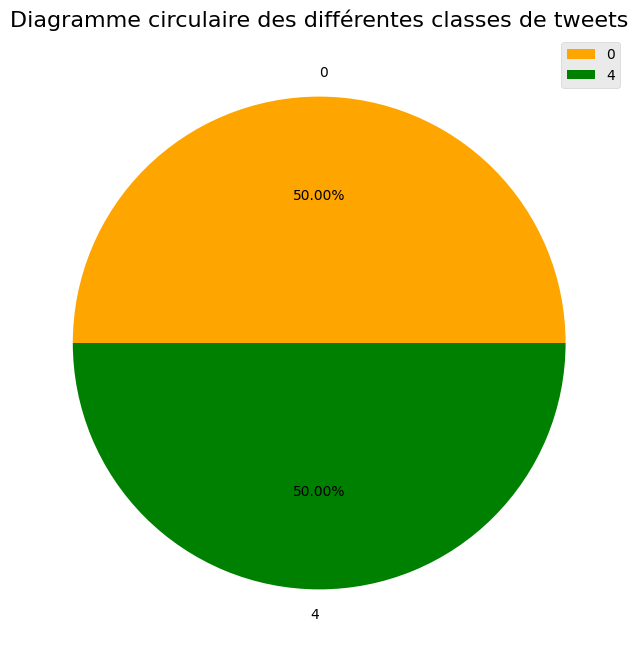

In [8]:
fig = plt.figure(figsize=(8,8))
labels = data.groupby('label').size()
labels.plot(kind='pie', subplots=True, figsize=(10, 8), autopct = "%.2f%%", colors=['orange','green'])
plt.title("Diagramme circulaire des différentes classes de tweets",fontsize=16)
plt.ylabel("")
plt.legend()
plt.show()

le dataset est divise en 2 parties egales 50 % des tweets negatifs et 50% autres des tweets positifs

Text(0, 0.5, 'Count')

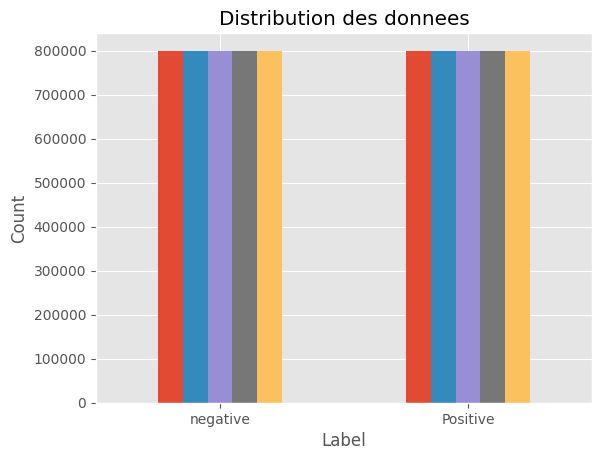

In [9]:
#Tracage de la distribution de dataset.
ax = data.groupby('label').count().plot(kind='bar', title='Distribution des donnees',
                                        legend=False)
ax.set_xticklabels(['negative', 'Positive'], rotation=0)
ax.set_xlabel('Label')
ax.set_ylabel('Count')

In [10]:
#Des infos sur les donnees 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   label     1599999 non-null  int64 
 1   id        1599999 non-null  int64 
 2   date      1599999 non-null  object
 3   query     1599999 non-null  object
 4   username  1599999 non-null  object
 5   text      1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [11]:
#types des donnees
data.dtypes

label        int64
id           int64
date        object
query       object
username    object
text        object
dtype: object

### Analyse exploratoire des données :

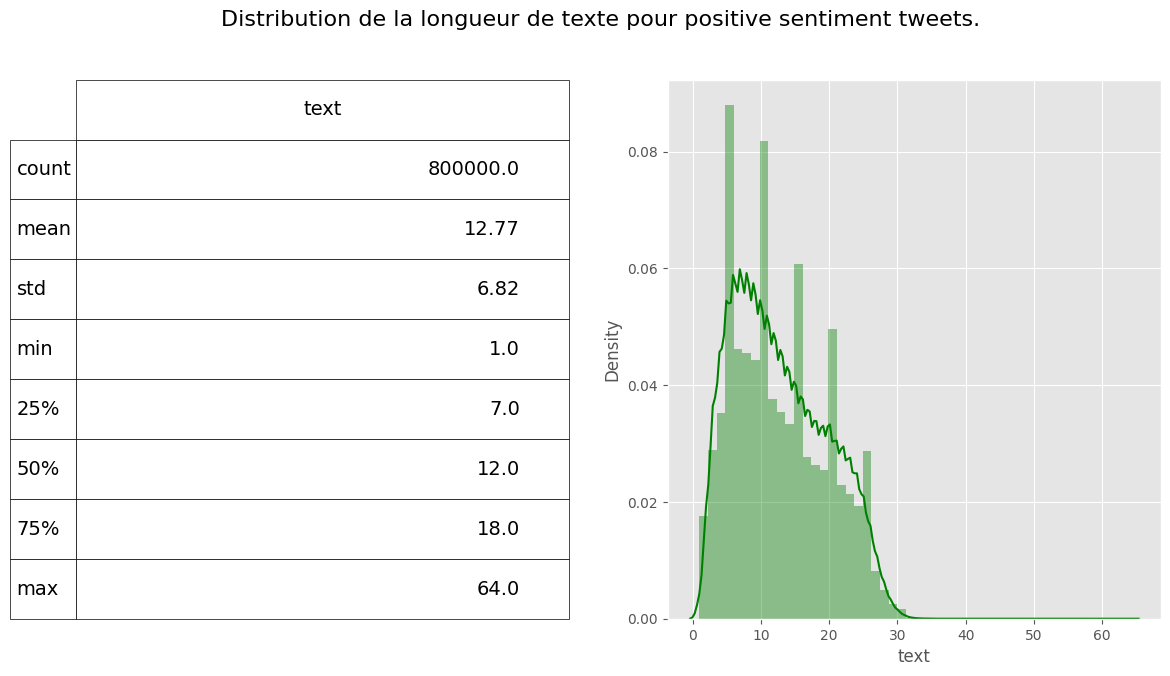

In [12]:
lengths = data.text.str.split().apply(len)

fig = plt.figure(figsize=(14,7))

ax1 = fig.add_subplot(122)
sns.distplot(lengths[data['label']==4], ax=ax1, color='green')
describe = lengths[data.label==4].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText=describe.values, rowLabels=describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution de la longueur de texte pour positive sentiment tweets.', fontsize=16)

plt.show()

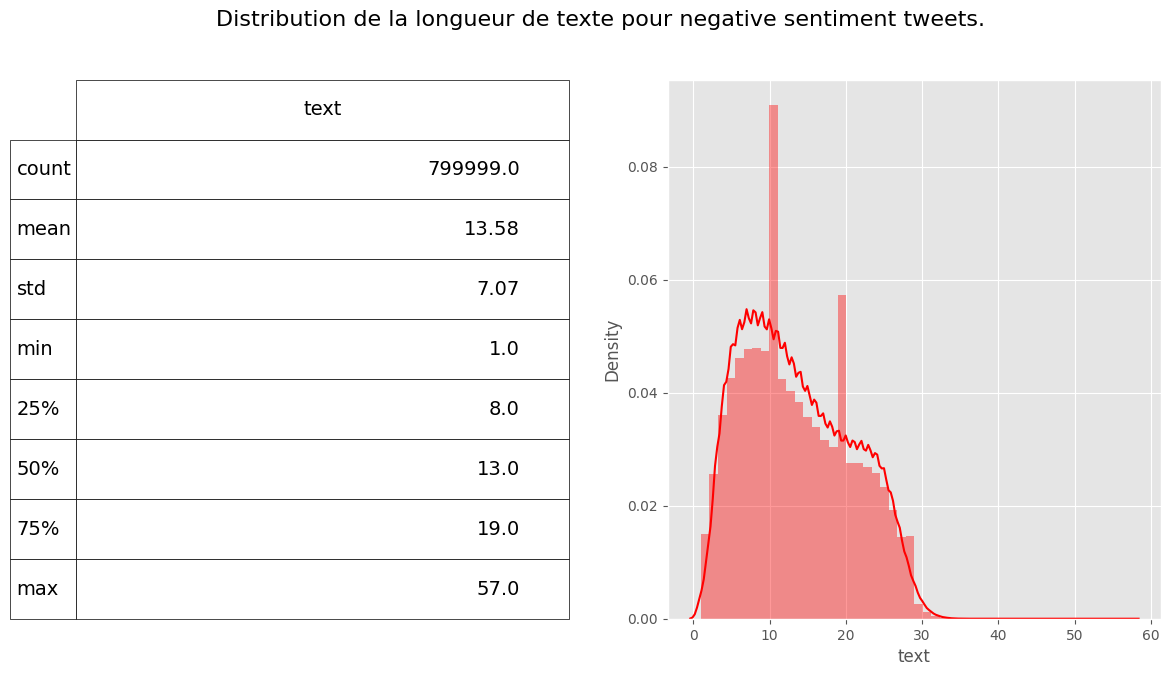

In [13]:
fig = plt.figure(figsize=(14,7))

ax1 = fig.add_subplot(122)
sns.distplot(lengths[data['label']==0], ax=ax1, color='red')
#sns.distplot(data[data['label']== 0]['length'], ax=ax1,color='red')
describe = lengths[data.label==0].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution de la longueur de texte pour negative sentiment tweets.', fontsize=16)

plt.show()

In [14]:
#cette ligne de code compte le nombre de lignes dans  
#data qui contiennent au moins une valeur nulle (NaN)
np.sum(data.isnull().any(axis=1))

0

In [15]:
#Nbr de lignes et de colonnes du dataset :
print("Le nombre de colonnes dans notre Dataset est :", len(data.columns))
print("Le nombre de lignes dans le dataset est :", len(data))

Le nombre de colonnes dans notre Dataset est : 6
Le nombre de lignes dans le dataset est : 1599999


<div class="alert alert-block alert-danger">  
<h2><center><strong>Preparation des donnees 📝</strong></center></h2>
        
</div>


* Selection des colonnes qui nous interesse 
* attribuer la valeur 1 aux sentiments positifs
* Separation des tweets negatifs et positifs puis prendre une partie de data pour chaque categorie puis les combiner 

In [16]:
#selectionner uniquement les colonnes 'text' et 'label' de Data
data= data[['text','label']]

In [17]:
#c'est dans le but de simplifier l'analyse et l'entraînement de nos modèles
data['label'][data['label']==4]=1

In [18]:
data_pos = data[data['label'] == 1]
data_neg = data[data['label'] == 0]

In [19]:
data_pos = data_pos.iloc[:int(800000)]
data_neg = data_neg.iloc[:int(800000)]

#Maintenant on combine les deux categories des tweets
data = pd.concat([data_pos, data_neg])
print(len(data))
data.head(2)

1599999


,text,label
799999,I LOVE @Health4UandPets u guys r the best!!,1
800000,im meeting up with one of my besties tonight! ...,1


###  * Nettoyage des tweets :
1. Minuscule
2. Remplacement des abreviations pour une meilleure comprehension (meme chose pour les abreviations , doivent etre remplaces apres la ponctu car y a des cas y a pas d'espace avec la pontuatiion )
3. Remplacement des emojis par leurs signification
4. suppression des emails/mentions(avant la ponctuation)
5. suppression des URLs
6. suppression des balises HTML (doit se faire avant ponctuation aussi)
7. Suppression de la ponctuation et des non-mots ( la ponctuation se fait avant les stopwords parce que y a des cas ou y a pas d'espace entre les stopwords et la ponctuation)
8. Suppression des mots vides 
9. Suppression de lettres consécutives : 3 lettres consécutives ou plus sont remplacées par 2 lettres. (par exemple : "goooood" devient "good")
10. suppression des chiffres
11. Tokenisation du texte des tweets
12. Radicalisation des mots
13. Lemmatisation : reduire les mots flechis ou declines a leur forme canonique ou a leur base lexicale (lemme) 



In [20]:
data['text'].head()

799999         I LOVE @Health4UandPets u guys r the best!! 
800000    im meeting up with one of my besties tonight! ...
800001    @DaRealSunisaKim Thanks for the Twitter add, S...
800002    Being sick can be really cheap when it hurts t...
800003      @LovesBrooklyn2 he has that effect on everyone 
Name: text, dtype: object

In [21]:
data['text'].tail()

799994    Sick  Spending my day laying in bed listening ...
799995                                      Gmail is down? 
799996                        rest in peace Farrah! So sad 
799997    @Eric_Urbane Sounds like a rival is flagging y...
799998    has to resit exams over summer...  wishes he w...
Name: text, dtype: object

In [22]:
data['text'] = data['text'].str.lower()
data['text'].tail()

799994    sick  spending my day laying in bed listening ...
799995                                      gmail is down? 
799996                        rest in peace farrah! so sad 
799997    @eric_urbane sounds like a rival is flagging y...
799998    has to resit exams over summer...  wishes he w...
Name: text, dtype: object

In [23]:
def cleaning_Abreviations(text):
    abr_remplacement = {
        'u' : 'you',
        'r' : 'are',
        'some1': 'somoene',
        'yrs' : 'yours',
        'hrs' : 'hours',
        'mins' : 'minutes',
        'secs': 'seconds',
        'pls': 'please',
        'plz' : 'please',
        '2morow': 'tomorrow',
        '2moro' : 'tomorrow',
        '2day': 'today',
        '4got': 'forget',
        '4gotten':'forget',
        'amp':'',
        'quot':'',
        'lt':'',
        'gt':'',
        '½25':'',
        'b4':'before',
        'thx':'thanks',
        'thnks':'thanks',
        'w/':'with',
        'w/o':'without',
        'gf':'girlfriend',
        'bf':'boyfriend',
        '2nite':'tonight',
        '2nyt':'tonight',
        'bc':'because',
        'b/c':'because',
        'bff':'bestfriend',
        'btw':'by the way',
        'ty' :'thank you',
        'cuz': 'because',
        'ilu': 'i love you',
        'coz': 'because',
        'ily' :'i love you',
        'gn': 'good night',
        'gm' : 'good morning',
        'fr': 'for real',
        'hme':'hit me up',
        'idk' : 'i don\'t know',
        'fwiw' : 'for what it\'s worth',
        'gonna': 'going to',
        'imo' :'in my opinion',
        'imho' :'in my humble opinion',
        'jk': 'just kidding',
        'lol':'laugh out loud',
        'wyd': 'what are you doing',
        'hru': 'how are you',
        'hbu': 'how about you',
        'wbu':'what about you',
        'ur' : 'your',
        'hv' :'have',
        'tmi':'too much information',
        'ttyl':'talk to you later',
        'sry' :'sorry',
        'tho':'though',
        'u\'re':'you are',
        'diy': 'do it yourself',
        'rofl': 'rolling on the floor laughing',
        'br':'best regards',
        'w8':'wait',
        'i\'m':'am',
        'im': 'am'
   }
    
    words = text.split()

    #appliquer les remplacements d'abreviations
    cleaned_words = []
    for word in words :
        if word in abr_remplacement:
            cleaned_word = abr_remplacement[word]
        else:
            cleaned_word = word
        cleaned_words.append(cleaned_word)

    return ' '.join(cleaned_words)

In [24]:
def cleaning_Emojis(text):
    emojis = {':)': 'smile',
                ':-)': 'smile',
                ';d': 'wink',
                ':-E': 'vampire',
                ':(': 'sad', 
                ':-(': 'sad',
                ':-<': 'sad',
                '<3': 'heart',
                ':P': 'raspberry', 
                ':O': 'surprised',
                ':-@': 'shocked', 
                ':@': 'shocked',
                ':-$': 'confused', 
                ':\\': 'annoyed', 
                ':#': 'mute', 
                ':X': 'mute', 
                ':^)': 'smile', 
                ':-&': 'confused', 
                '$_$': 'greedy',
                '@@': 'eyeroll', 
                ':O' : 'shoked',
                ':-!': 'confused', 
                ':-D': 'laughing',
                'XD':'laughing', 
                ':-0': 'yell', 
                'O.o': 'confused',
                '<(-_-)>': 'robot',
                'd[-_-]b': 'dj',
                ":'-)": 'sadsmile',
                ';)': 'wink', 
                ';-)': 'wink',
                'X-(':'disappointed',
                'O:-)': 'angel',
                'O*-)': 'angel',
                '(:-D': 'gossip',
                '=^.^=': 'cat'
                }
    
    words = text.split()

    # Appliquer les remplacements d'emojis
    cleaned_words = []
    for word in words:
        if word in emojis:
            cleaned_word = emojis[word]
        else:
            cleaned_word = word
        cleaned_words.append(cleaned_word)

    return ' '.join(cleaned_words)


In [25]:
data['text'].tail()

799994    sick  spending my day laying in bed listening ...
799995                                      gmail is down? 
799996                        rest in peace farrah! so sad 
799997    @eric_urbane sounds like a rival is flagging y...
799998    has to resit exams over summer...  wishes he w...
Name: text, dtype: object

In [26]:
data['text'] = data['text'].apply(lambda x: cleaning_Emojis(x))
data['text'].tail()

799994    sick spending my day laying in bed listening t...
799995                                       gmail is down?
799996                         rest in peace farrah! so sad
799997    @eric_urbane sounds like a rival is flagging y...
799998    has to resit exams over summer... wishes he wo...
Name: text, dtype: object

In [27]:
#Enlever les emails et URL
def cleaning_email(data):
    return re.sub('@[^\s]+', ' ',data)

def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(http?://[^\s]+))', ' ',data)

In [28]:
data['text'].tail()

799994    sick spending my day laying in bed listening t...
799995                                       gmail is down?
799996                         rest in peace farrah! so sad
799997    @eric_urbane sounds like a rival is flagging y...
799998    has to resit exams over summer... wishes he wo...
Name: text, dtype: object

In [29]:
data['text'] = data['text'].apply(lambda x: cleaning_email(x))
data['text'] = data['text'].apply(lambda x: cleaning_URLs(x))

data['text'].tail()

799994    sick spending my day laying in bed listening to  
799995                                       gmail is down?
799996                         rest in peace farrah! so sad
799997      sounds like a rival is flagging your ads. no...
799998    has to resit exams over summer... wishes he wo...
Name: text, dtype: object

In [30]:
def cleaning_balisesHTML(text):
    return re.sub(r'<.*?>', '',text) 

In [31]:
data['text'] = data['text'].apply(lambda x: cleaning_balisesHTML(x))

In [32]:
ponctuation_list = string.punctuation
def cleaning_ponctuations_espaces(text):
    #str.maketrans() crée une table de traduction qui indique à translate() quelles lettres doivent être supprimées
    #translator = str.maketrans('','', ponctuation_list)
    translator = str.maketrans(ponctuation_list, ' ' * len(ponctuation_list))
    text_no_ponctuation = text.translate(translator)
    text_cleaned = re.sub(r'\s+',' ', text_no_ponctuation)
    return text_cleaned

* \s: Correspond à tout caractère d'espace blanc, y compris les espaces, les tabulations et les retours à la ligne.
* +: Signifie une ou plusieurs occurrences du motif précédent, c'est-à-dire un ou plusieurs espaces blancs consécutifs.

In [33]:
data['text'] = data['text'].apply(lambda x:cleaning_ponctuations_espaces(x))
data['text'].tail()
#print(ponctuation_list)

799994     sick spending my day laying in bed listening to 
799995                                       gmail is down 
799996                          rest in peace farrah so sad
799997     sounds like a rival is flagging your ads not ...
799998    has to resit exams over summer wishes he worke...
Name: text, dtype: object

In [34]:
data['text'] = data['text'].apply(lambda text: cleaning_Abreviations(text))
data['text'].head()

799999                         i love you guys are the best
800000    am meeting up with one of my besties tonight c...
800001    thanks for the twitter add sunisa i got to mee...
800002    being sick can be really cheap when it hurts t...
800003                       he has that effect on everyone
Name: text, dtype: object

In [35]:
stopwords_list = stopwords.words('english')
#print(stopwords_list)

In [36]:
", ".join(stopwords.words('english')) 

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [37]:
MOTSVIDES = set(stopwords.words('english'))
def cleaning_MotsVides(text):
    return " ".join([word for word in str(text).split() if word not in MOTSVIDES])


data['text'] = data['text'].apply(lambda text: cleaning_MotsVides(text))
#data['text'].head()
#print(data.tail())
data['text'].head()

799999                                       love guys best
800000      meeting one besties tonight cant wait girl talk
800001    thanks twitter add sunisa got meet hin show dc...
800002    sick really cheap hurts much eat real food plu...
800003                                      effect everyone
Name: text, dtype: object

In [38]:
def cleaning_char_repetes(text):
    return re.sub(r'(.)\1{1,}',r'\1\1',text)

In [39]:
data['text'] = data['text'].apply(lambda x:cleaning_char_repetes(x))
data['text'].tail()

799994               sick spending day laying bed listening
799995                                                gmail
799996                                rest peace farrah sad
799997           sounds like rival flagging ads much though
799998    resit exams summer wishes worked harder first ...
Name: text, dtype: object

In [40]:
def cleaning_nombres(data):
    return re.sub('[0-9]+', '',data)

In [41]:
data['text'] = data['text'].apply(lambda x: cleaning_nombres(x))
data['text'].tail()

799994               sick spending day laying bed listening
799995                                                gmail
799996                                rest peace farrah sad
799997           sounds like rival flagging ads much though
799998    resit exams summer wishes worked harder first ...
Name: text, dtype: object

In [42]:
tokenizer = RegexpTokenizer(r'\w+')
data['text']= data['text'].apply(tokenizer.tokenize)

In [43]:
data['text'].tail()

799994        [sick, spending, day, laying, bed, listening]
799995                                              [gmail]
799996                           [rest, peace, farrah, sad]
799997    [sounds, like, rival, flagging, ads, much, tho...
799998    [resit, exams, summer, wishes, worked, harder,...
Name: text, dtype: object

In [44]:
start_time = time()
st = nltk.PorterStemmer()
def Radicalisation_sur_text(data):
    text = [st.stem(word) for word in data]
    return text

data['text']= data['text'].apply(lambda x: Radicalisation_sur_text(x))
print('Le temps du CPU pour la radicalisation:', time() - start_time)

Le temps du CPU pour la radicalisation: 556.7714140415192


In [45]:
data['text'].tail()

799994                 [sick, spend, day, lay, bed, listen]
799995                                              [gmail]
799996                            [rest, peac, farrah, sad]
799997         [sound, like, rival, flag, ad, much, though]
799998    [resit, exam, summer, wish, work, harder, firs...
Name: text, dtype: object

In [46]:
start_time = time()
lm = nltk.WordNetLemmatizer()
def lemmatisation_sur_text(data):
    text = [lm.lemmatize(word) for word in data]
    return text

data['text'] = data['text'].apply(lambda x: lemmatisation_sur_text(x))
print('Le temps du CPU pour la lemmatisation :', time() - start_time)

Le temps du CPU pour la lemmatisation : 101.29867386817932


In [47]:
data['text'].tail()

799994                 [sick, spend, day, lay, bed, listen]
799995                                              [gmail]
799996                            [rest, peac, farrah, sad]
799997         [sound, like, rival, flag, ad, much, though]
799998    [resit, exam, summer, wish, work, harder, firs...
Name: text, dtype: object

### Visualisation des donnees

Positive words


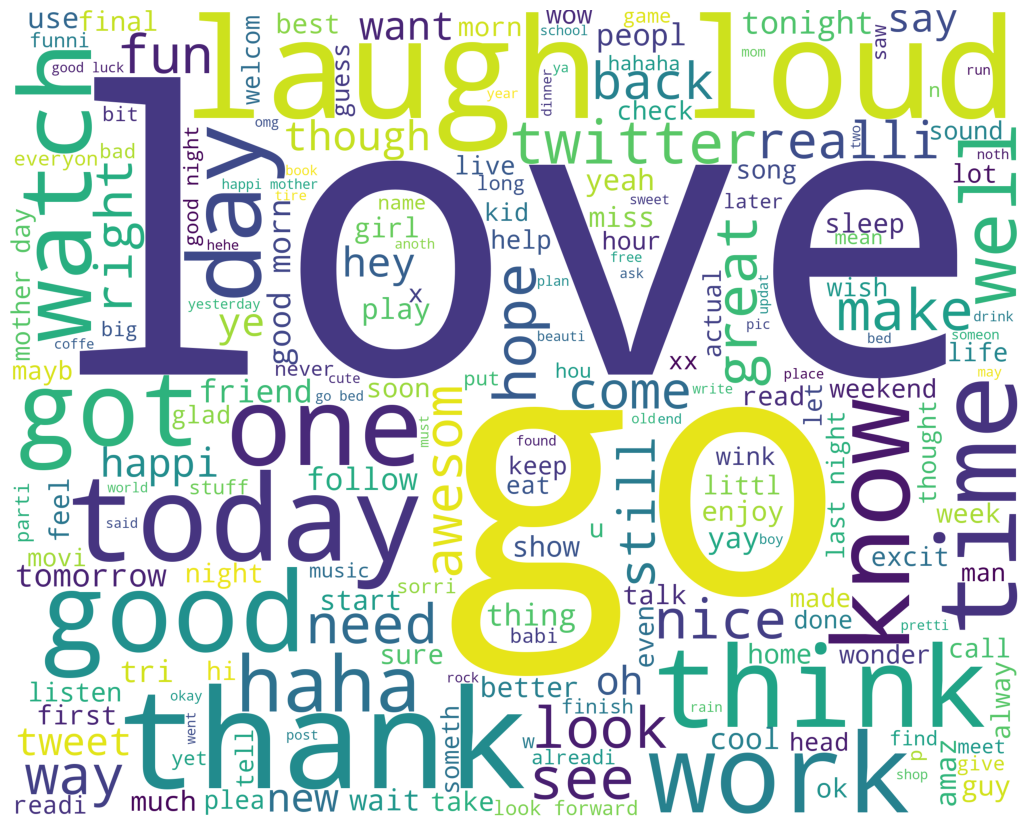

Negative words


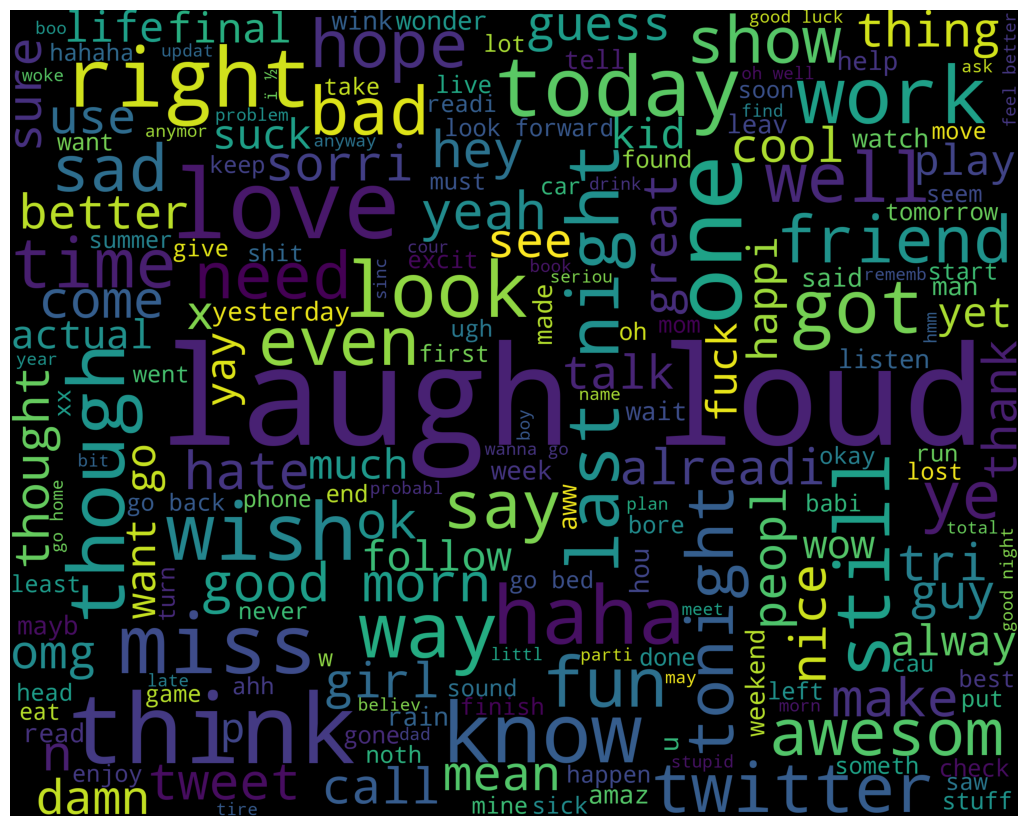

Le temps du CPU : 175.60763120651245


In [48]:
start_time = time()

# Assurez-vous que processedtext est une liste de chaînes de caractères
processedtext = [item for sublist in data['text'] for item in sublist]

# Séparez les données en mots positifs et négatifs
data_pos = processedtext[:800000]
data_neg = processedtext[800000:]
# Définition de la fonction pour dessiner un nuage de mots
def wordcloud_draw(data, color = 'black'):
    wordcloud = WordCloud(stopwords = STOPWORDS,
                          background_color = color,
                          width = 2500,
                          height = 2000
                         ).generate(' '.join(data))
    plt.figure(1, figsize = (13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()


print("Positive words")
wordcloud_draw(data_pos, 'white')
print("Negative words")
wordcloud_draw(data_neg)

print('Le temps du CPU :', time() - start_time)


C'est intéressant d'observer la (plus grande) occurrence des mots "love"dans les tweets positifs, et de "Work" dans les tweets négatifs. Cependant, et à mon avis, l'information la plus convaincante observée dans ces images est sans aucun doute l'énorme occurrence du mot "today" dans les tweets négatifs ( comparant a sa petite occurence  dans les tweets positifs )

On peut interprèter cette information de la manière suivante : Les mauvaises nouvelles se propagent plus vite que les bonnes nouvelles. Les gens ont tendance à parler et à partager les mauvaises nouvelles beaucoup plus fréquemment et beaucoup plus rapidement que les bonnes nouvelles.

### Construction du vocabulaire 

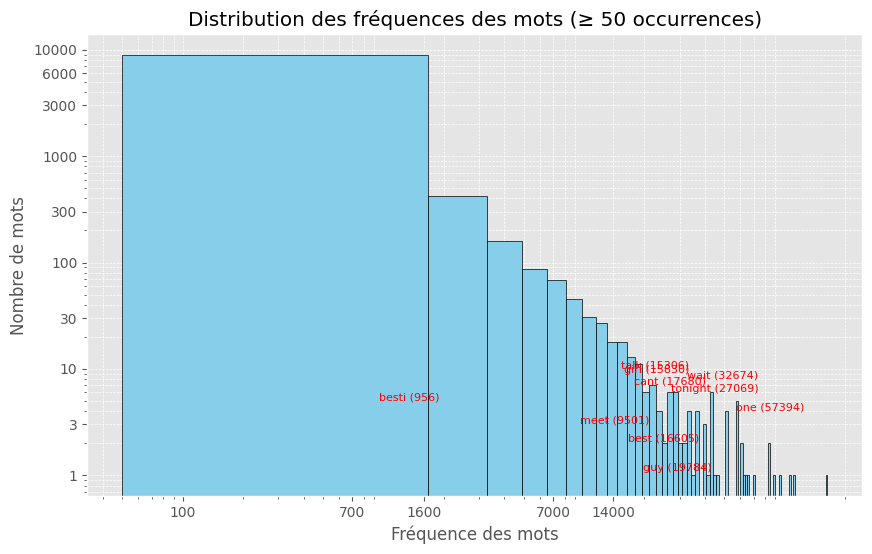

In [49]:
# Compter les occurrences de chaque mot dans le corpus
word_counts = Counter()
for tweet in data['text']:
    word_counts.update(tweet)

# Définir un seuil de fréquence minimale (par exemple, 10 occurrences)
seuil_min = 50

# Filtrer les mots rares
mots_filtrés = [mot for mot, freq in word_counts.items() if freq >= seuil_min]
frequences_filtrées = [word_counts[mot] for mot in mots_filtrés]

# Créer un histogramme de la distribution des fréquences des mots filtrés
plt.figure(figsize=(10, 6))
plt.hist(frequences_filtrées, bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution des fréquences des mots (≥ {} occurrences)'.format(seuil_min))
plt.xlabel('Fréquence des mots')
plt.ylabel('Nombre de mots')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Définir les étiquettes de l'axe des y de manière personnalisée
yticks = [1, 3, 10, 30, 100, 300, 1000, 3000,6000, 10000]  # Valeurs personnalisées pour l'axe y
yticklabels = [str(val) for val in yticks]  # Convertir les valeurs en chaînes de caractères pour les étiquettes
plt.yticks(yticks, yticklabels)  # Définir les étiquettes personnalisées pour l'axe y

# Définir les étiquettes de l'axe des x de manière personnalisée
xticks = [100,700, 1600, 7000, 14000]  # Valeurs personnalisées pour l'axe x
xticklabels = [str(val) for val in xticks]  # Convertir les valeurs en chaînes de caractères pour les étiquettes
plt.xticks(xticks, xticklabels)  # Définir les étiquettes personnalisées pour l'axe x

# Annotations pour les 10 mots les plus fréquents
mots_top10 = mots_filtrés[:11]
frequences_top10 = frequences_filtrées[:11]
for i, (mot, freq) in enumerate(zip(mots_top10, frequences_top10)):
    plt.annotate(f"{mot} ({freq})", xy=(freq, i + 0.1), color='red', fontsize=8)

plt.show()


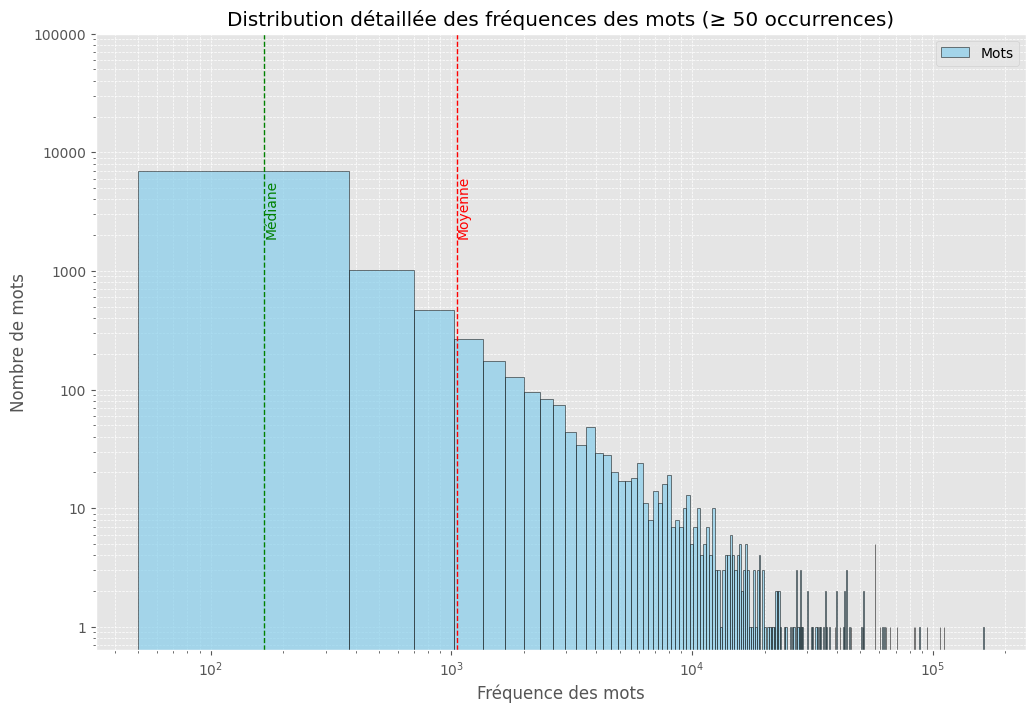

In [50]:
# Créer un histogramme de la distribution des fréquences des mots filtrés avec plus de bins
plt.figure(figsize=(12, 8))
plt.hist(frequences_filtrées, bins=500, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution détaillée des fréquences des mots (≥ {} occurrences)'.format(seuil_min))
plt.xlabel('Fréquence des mots')
plt.ylabel('Nombre de mots')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Ajouter une légende pour plus de clarté
plt.legend(['Mots'], loc='upper right')

# Ajouter des annotations pour les statistiques principales
plt.axvline(x=np.mean(frequences_filtrées), color='r', linestyle='--', linewidth=1)
plt.text(np.mean(frequences_filtrées), 2000, 'Moyenne', rotation=90, color='r')
plt.axvline(x=np.median(frequences_filtrées), color='g', linestyle='--', linewidth=1)
plt.text(np.median(frequences_filtrées), 2000, 'Médiane', rotation=90, color='g')

# Définir les étiquettes de l'axe des y avec des valeurs personnalisées pour une meilleure lisibilité
yticks = [1, 10, 100, 1000, 10000, 100000]  
yticklabels = [str(val) for val in yticks]  
plt.yticks(yticks, yticklabels)  

plt.show()


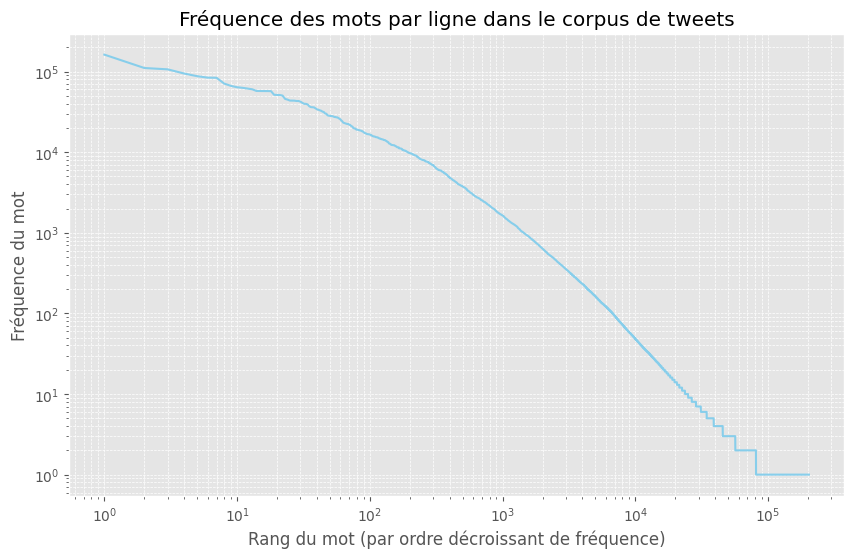

In [51]:
# Compter les occurrences de chaque mot dans le corpus
word_counts = Counter()
for tweet in data['text']:
    word_counts.update(tweet)

# Triez les mots par fréquence d'apparition
sorted_word_counts = sorted(word_counts.values(), reverse=True)

# Créer une liste pour les rangs des mots
ranks = list(range(1, len(sorted_word_counts) + 1))

# Visualisation de la fréquence des mots par une ligne
plt.figure(figsize=(10, 6))
plt.plot(ranks, sorted_word_counts, color='skyblue')
plt.title('Fréquence des mots par ligne dans le corpus de tweets')
plt.xlabel('Rang du mot (par ordre décroissant de fréquence)')
plt.ylabel('Fréquence du mot')
plt.xscale('log')  # Utilisation d'une échelle logarithmique pour une meilleure visualisation
plt.yscale('log')  # Utilisation d'une échelle logarithmique pour une meilleure visualisation
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Ajout de grilles pour une meilleure lisibilité
plt.show()


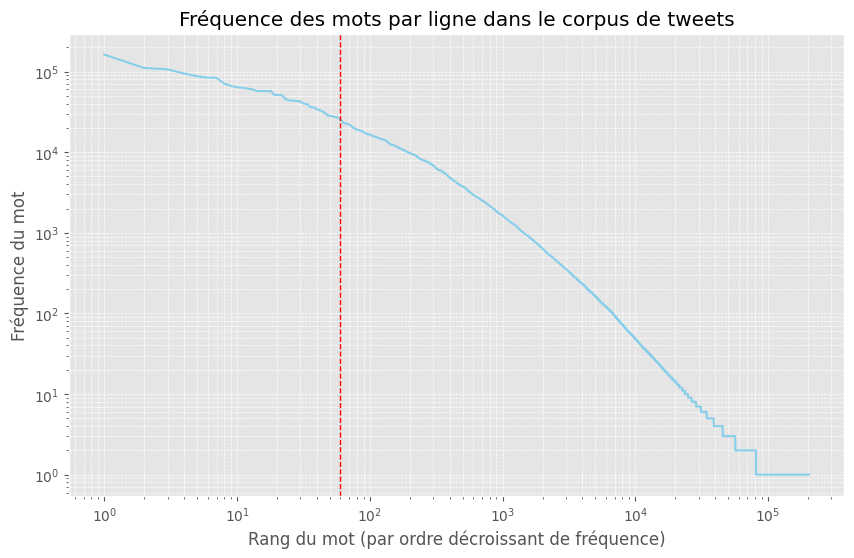

In [52]:
# Compter les occurrences de chaque mot dans le corpus
word_counts = Counter()
for tweet in data['text']:
    word_counts.update(tweet)

# Triez les mots par fréquence d'apparition
sorted_word_counts = sorted(word_counts.values(), reverse=True)

# Créer une liste pour les rangs des mots
ranks = list(range(1, len(sorted_word_counts) + 1))

# Convertir les listes en tableaux numpy
ranks_array = np.array(ranks).reshape(-1, 1)
sorted_word_counts_array = np.array(sorted_word_counts)

# Utiliser l'algorithme de détection de ruptures pour identifier les points d'inflexion
model = rpt.Dynp(model="l2", min_size=3).fit(sorted_word_counts_array)
result = model.predict(n_bkps=1)

# Visualisation de la fréquence des mots par une ligne
plt.figure(figsize=(10, 6))
plt.plot(ranks, sorted_word_counts, color='skyblue')
plt.title('Fréquence des mots par ligne dans le corpus de tweets')
plt.xlabel('Rang du mot (par ordre décroissant de fréquence)')
plt.ylabel('Fréquence du mot')
plt.xscale('log')  # Utilisation d'une échelle logarithmique pour une meilleure visualisation
plt.yscale('log')  # Utilisation d'une échelle logarithmique pour une meilleure visualisation
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Ajout de grilles pour une meilleure lisibilité

# Afficher le point d'inflexion sur le graphique
plt.axvline(x=result[0], color='red', linestyle='--', linewidth=1)

plt.show()


In [53]:
# Définir la valeur de K
K = 600 # Vous pouvez ajuster cette valeur empiriquement
#K =500

# Compter le nombre d'occurrences de chaque mot dans nos tweets
word_counts = Counter()

for tweet in data['text']:
    for word in tweet:  # Pas besoin de split(), itérer directement sur les listes de mots
        word_counts[word] += 1  

# Filtrer les mots qui apparaissent au moins K fois
filtered_words = {word: count for word, count in word_counts.items() if count >= K}

# Tri des mots en fonction de leur fréquence d'apparition "ordre décroissant"
#sorted_words = sorted(filtered_words.items(), key=lambda x: x[1], reverse=True)

top_words = sorted(filtered_words.items(), key=lambda x: x[1], reverse=True)

# Sélectionner les mots les plus fréquents
#top_words = sorted_words[:2000]  

# Sauvegarde des mots sélectionnés dans un fichier vocabulaire
with open('vocab.txt', 'w') as file:
    for word, _ in top_words:
        file.write(word + '\n')

# Nombre de mots dans le vocabulaire
nombre_mots_vocabulaire = len(top_words)
print("Nombre de mots dans le vocabulaire :", nombre_mots_vocabulaire)


Nombre de mots dans le vocabulaire : 2079


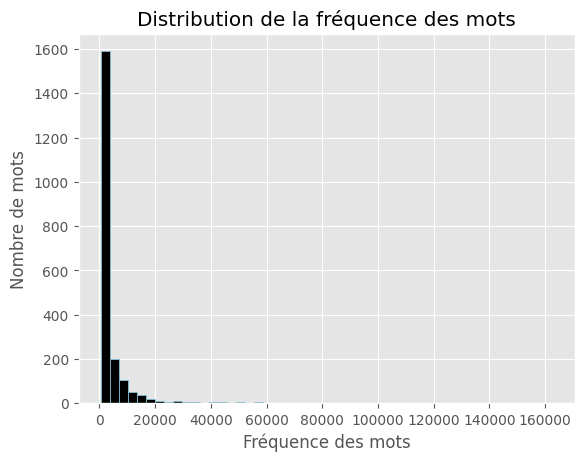

In [54]:
# Obtenir les fréquences des mots
frequencies = [count for word, count in filtered_words.items()]

# Tracer l'histogramme
plt.hist(frequencies, bins=50, color='black', edgecolor='skyblue')
plt.xlabel('Fréquence des mots')
plt.ylabel('Nombre de mots')
plt.title('Distribution de la fréquence des mots')
plt.show()


In [55]:
# Lecture du fichier de vocabulaire
print("Lecture du fichier de vocabulaire...")  
with open('vocab.txt', 'r', encoding='latin-1') as file:
    vocabulaire = file.read().splitlines()

# Creation d'un dictionnaire qui mappe chaque mot a son index dans le vocabulaire
print("Creation du dictionnaire de vocabulaire...")
dictionnaire_vocabulaire = {mot: index for index, mot in enumerate(vocabulaire)}

# Liste pour stocker les index des mots dans chaque tweet
index_tweets = []

# Parcours des tweets 
print("Mapping des mots des tweets vers les index du vocabulaire...")
for i, tweet in enumerate(data['text'], 1):
    index_tweet = []  
    # Parcours de chaque mot dans le tweet
    for mot in tweet:
        # Vérification si le mot est présent dans le dictionnaire de vocabulaire
        if mot in dictionnaire_vocabulaire:
            # Ajout de l'index du mot dans la liste d'index du tweet
            index_tweet.append(dictionnaire_vocabulaire[mot])
    # Ajout de la liste d'index du tweet à la liste d'index des tweets
    index_tweets.append(index_tweet)
    # Affichage de la progression
    if i % 100000 == 0:
        print(f"Tweets traités : {i}/{len(data)}")

print("Terminé.")


Lecture du fichier de vocabulaire...
Creation du dictionnaire de vocabulaire...
Mapping des mots des tweets vers les index du vocabulaire...
Tweets traités : 100000/1599999
Tweets traités : 200000/1599999
Tweets traités : 300000/1599999
Tweets traités : 400000/1599999
Tweets traités : 500000/1599999
Tweets traités : 600000/1599999
Tweets traités : 700000/1599999
Tweets traités : 800000/1599999
Tweets traités : 900000/1599999
Tweets traités : 1000000/1599999
Tweets traités : 1100000/1599999
Tweets traités : 1200000/1599999
Tweets traités : 1300000/1599999
Tweets traités : 1400000/1599999
Tweets traités : 1500000/1599999
Terminé.


les tweets sont représentés par des séquences d'index, où chaque index correspond à un mot dans le vocabulaire. Ces séquences d'index sont ensuite traitées avec du padding pour avoir une longueur fixe, mais l'ordre des mots dans chaque séquence est préservé. Ainsi, même si les mots sont représentés par leurs index et non pas directement par leur présence ou leur absence, l'ordre des mots est toujours conservé dans la représentation

### Extraction des caracteristiques

In [56]:
#separation des caracteristiques et labels 
X = data.text
y = data.label

In [57]:
# Diviser les donnnees en donnnees d'entrainement et donnees de validation

X_train,X_val,y_train,y_val = train_test_split(data.text, data.label, test_size = 0.2, random_state = 42)

In [58]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(1279999,)
(1279999,)
(320000,)
(320000,)


In [59]:
# Vérifier le type de X_train
print(type(X_train))

# Afficher les cinq premiers éléments de X_train
print(X_train[:5])


<class 'pandas.core.series.Series'>
641334     [feel, bad, caus, need, work, am, ride, anyon,...
369011                                    [sorri, hear, hon]
680550              [alway, miss, meet, hometown, ugh, luck]
1590713     [true, especi, whole, second, set, stair, clean]
447006     [love, watch, program, horribl, know, pete, ar...
Name: text, dtype: object


#### Methode 1: TF-IDF

In [ ]:
# Joining the elements of the list into a single string
X_train_concatenated = [' '.join(x) for x in X_train]
X_val_concatenated = [' '.join(x) for x in X_val]

# Initialisation du vectoriseur TF-IDF
tfidf = TfidfVectorizer(max_df=0.90, min_df=0.02, max_features=len(dictionnaire_vocabulaire), vocabulary=dictionnaire_vocabulaire)

tfidf.fit(X_train_concatenated)
print(f'Vectoriser fitted.')
num_vocab_words = len(tfidf.vocabulary_)
print('Nombre des mots caracteristiques:', num_vocab_words)
#print('Nombre des mots caracteristiques: ', len(tfidf.get_feature_names()))

X_train_tfidf = tfidf.transform(X_train_concatenated)
X_val_tfidf = tfidf.transform(X_val_concatenated)
print(f'Data Transformed.')


#### Methode 2 :  Le comptage (CountVectorizer)

In [ ]:
# Initialisation du vectoriseur CountVectorizer
count_vectorizer = CountVectorizer(max_df=0.90, min_df=0.02, max_features=len(dictionnaire_vocabulaire), vocabulary=dictionnaire_vocabulaire)

# Adapter le vectoriseur CountVectorizer aux données d'entraînement
count_vectorizer.fit(X_train_concatenated)
print(f'Vectoriser fitted.')

num_vocab_words = len(count_vectorizer.vocabulary_)
print('Nombre des mots caracteristiques:', num_vocab_words)


# Transformer les données d'entraînement et de validation en vecteurs d'occurrence des mots
X_train_count = count_vectorizer.transform(X_train_concatenated)
X_val_count = count_vectorizer.transform(X_val_concatenated)
print(f'Data Transformed.')

Vectoriser fitted.
Nombre des mots caracteristiques: 2079
Data Transformed.


<div class="alert alert-block alert-danger">  
<h2><center><strong>Classification</strong></center></h2>   
</div>

### Utilisation des classifieurs ML :

#### La fonction d'evaluation des modeles

In [ ]:
def model_Evaluation(model):
    # Predire les valeurs pour les donnees du test
    y_pred = model.predict(X_val_tfidf)

    # Afficher les metriques d'evaluation pour le dataset
    print("Classification Report:")
    print(classification_report(y_val, y_pred))

    # Calculer et afficher la matrice de confusion
    cf_matrix = confusion_matrix(y_val, y_pred)
    categories = ['Negative','Positive']
    group_names = ['Vrai Neg', 'Faux Pos', 'Faux Neg', 'Vrai Pos']
    group_pourcentage = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/ np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_pourcentage)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cf_matrix, annot=labels, cmap='Blues', fmt='', xticklabels=categories, yticklabels=categories)
    plt.xlabel("Predicted values", fontdict={'size': 14}, labelpad=10)
    plt.ylabel("Actual values", fontdict={'size': 18}, labelpad=10)
    plt.title("Confusion Matrix", fontdict={'size': 18}, pad=20)
    plt.show()


In [ ]:
def model_Evaluation2(model):

    #Predire les valeurs pour les donnees du test
    y_pred = model.predict(X_val_count)

    #afficher les metriques d'evaluation pour le dataset
    print(classification_report(y_val,y_pred))

    #calculer et afficher la matrice de confusion
    cf_matrix = confusion_matrix(y_val, y_pred)

    categories = ['Negative','Positive']
    group_names = ['Vrai Neg', 'Faux Pos', 'Faux Neg', 'Vrai Pos']
    group_pourcentage = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/ np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_pourcentage)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot=labels, cmap='Blues', fmt='', xticklabels=categories, yticklabels=categories)

    plt.xlabel("Predicted values", fontdict={'size': 14}, labelpad=10)
    plt.ylabel("Actual values", fontdict={'size':18}, labelpad=10)
    plt.title("Confusion Matrix", fontdict={'size':18}, pad=20)
    plt.show()

#### 1- BernoulliNB Model

Meilleurs paramètres: {'alpha': 1.5}
Accuracy: 0.7521875
              precision    recall  f1-score   support

           0       0.76      0.73      0.75    160506
           1       0.74      0.77      0.76    159494

    accuracy                           0.75    320000
   macro avg       0.75      0.75      0.75    320000
weighted avg       0.75      0.75      0.75    320000



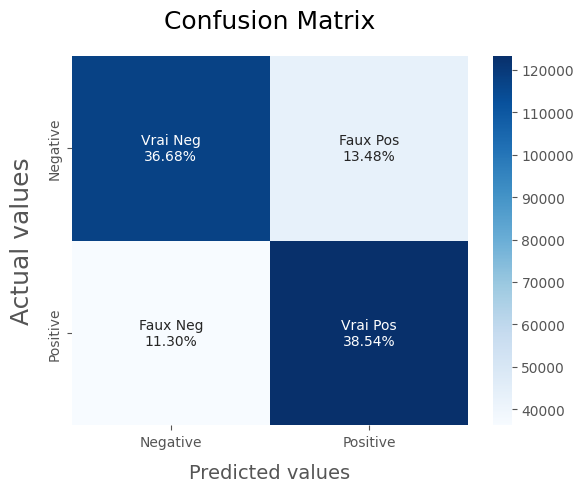

In [ ]:
def model_EvaluationBernoulli(model, X_val, y_val):
    # Predire les valeurs pour les donnees de validation
    y_pred = model.predict(X_val)

    # Calculer et afficher l'accuracy
    accuracy = accuracy_score(y_val, y_pred)
    print("Accuracy:", accuracy)

    # Afficher les metriques d'evaluation pour le dataset
    print(classification_report(y_val, y_pred))

    # Calculer et afficher la matrice de confusion
    cf_matrix = confusion_matrix(y_val, y_pred)

    categories = ['Negative', 'Positive']
    group_names = ['Vrai Neg', 'Faux Pos', 'Faux Neg', 'Vrai Pos']
    group_pourcentage = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_pourcentage)]
    labels = np.asarray(labels).reshape(2, 2)

    sns.heatmap(cf_matrix, annot=labels, cmap='Blues', fmt='', xticklabels=categories, yticklabels=categories)
    plt.xlabel("Predicted values", fontdict={'size': 14}, labelpad=10)
    plt.ylabel("Actual values", fontdict={'size': 18}, labelpad=10)
    plt.title("Confusion Matrix", fontdict={'size': 18}, pad=20)
    plt.show()


# Définir les valeurs alpha à rechercher
alphas = [0.1, 0.5, 1.0, 1.5, 2.0]

# Définir la grille des paramètres
param_grid = {'alpha': alphas}

# Initialiser le modèle Bernoulli Naive Bayes
BNBmodel = BernoulliNB()

# Créer un objet GridSearchCV
grid_search = GridSearchCV(BNBmodel, param_grid, cv=5, scoring='accuracy')

# Exécuter la recherche sur grille sur les données d'entraînement
grid_search.fit(X_train_tfidf, y_train)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres:", grid_search.best_params_)

# Obtenir le meilleur modèle trouvé par la recherche sur grille
best_BNBmodel = grid_search.best_estimator_

# Évaluer le meilleur modèle
model_EvaluationBernoulli(best_BNBmodel, X_val_tfidf, y_val)


In [ ]:
best_BNBmodel.fit(X_train_count, y_train)
model_Evaluation2(best_BNBmodel)

' best_BNBmodel.fit(X_train_count, y_train)\nmodel_Evaluation2(best_BNBmodel) '

#### 2- MVS (LinearSVC)

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.73      0.75    160506
           1       0.74      0.79      0.76    159494

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



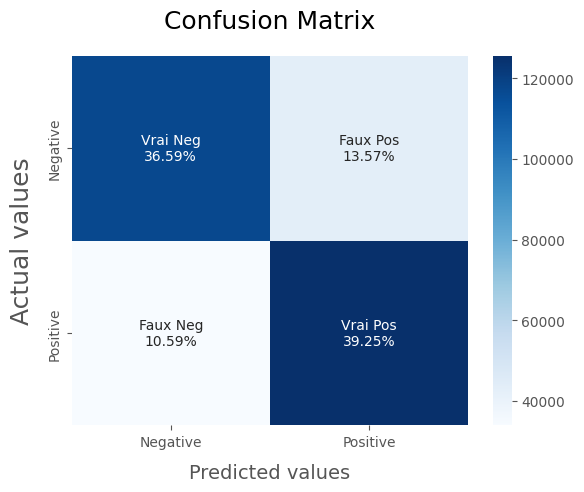

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train_tfidf, y_train)
model_Evaluation(SVCmodel)

In [ ]:
SVCmodel.fit(X_train_count, y_train)
model_Evaluation2(SVCmodel)

' SVCmodel.fit(X_train_count, y_train)\nmodel_Evaluation2(SVCmodel) '

#### 3- Regression logistique

In [ ]:
# Définir la grille des hyperparamètres à rechercher
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'max_iter': [100, 200, 500, 1000],
              'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}

# Initialiser le modèle Logistic Regression
LRmodel = LogisticRegression()

# Créer un objet GridSearchCV
grid_search = GridSearchCV(LRmodel, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Exécuter la recherche sur grille sur les données d'entraînement
grid_search.fit(X_train_tfidf, y_train)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres:", grid_search.best_params_)

# Obtenir le meilleur modèle trouvé par la recherche sur grille
best_LRmodel = grid_search.best_estimator_

# Évaluer le meilleur modèle
model_Evaluation(best_LRmodel)

' # Définir la grille des hyperparamètres à rechercher\nparam_grid = {\'C\': [0.001, 0.01, 0.1, 1, 10, 100],\n              \'max_iter\': [100, 200, 500, 1000],\n              \'solver\': [\'liblinear\', \'newton-cg\', \'lbfgs\', \'sag\', \'saga\']}\n\n# Initialiser le modèle Logistic Regression\nLRmodel = LogisticRegression()\n\n# Créer un objet GridSearchCV\ngrid_search = GridSearchCV(LRmodel, param_grid, cv=5, scoring=\'accuracy\', n_jobs=-1)\n\n# Exécuter la recherche sur grille sur les données d\'entraînement\ngrid_search.fit(X_train_tfidf, y_train)\n\n# Afficher les meilleurs paramètres trouvés\nprint("Meilleurs paramètres:", grid_search.best_params_)\n\n# Obtenir le meilleur modèle trouvé par la recherche sur grille\nbest_LRmodel = grid_search.best_estimator_\n\n# Évaluer le meilleur modèle\nmodel_Evaluation(best_LRmodel) '

In [ ]:
best_LRmodel.fit(X_train_count, y_train)
model_Evaluation2(best_LRmodel)

' best_LRmodel.fit(X_train_count, y_train)\nmodel_Evaluation2(best_LRmodel) '

#### 4- KNN

In [ ]:
KNNmodel = KNeighborsClassifier()
KNNmodel.fit(X_train_tfidf, y_train)
model_Evaluation(KNNmodel)

' KNNmodel = KNeighborsClassifier()\nKNNmodel.fit(X_train_tfidf, y_train)\nmodel_Evaluation(KNNmodel) '

In [ ]:
KNNmodel.fit(X_train_count, y_train)
model_Evaluation2(KNNmodel)

' KNNmodel.fit(X_train_count, y_train)\nmodel_Evaluation2(KNNmodel) '

#### 5- Decision Tree

In [ ]:
DTmodel = DecisionTreeClassifier()
DTmodel.fit(X_train_tfidf, y_train)
model_Evaluation(DTmodel)

' DTmodel = DecisionTreeClassifier()\nDTmodel.fit(X_train_tfidf, y_train)\nmodel_Evaluation(DTmodel) '

In [ ]:
DTmodel.fit(X_train_count, y_train)
model_Evaluation2(DTmodel)

' DTmodel.fit(X_train_count, y_train)\nmodel_Evaluation2(DTmodel) '

#### 6- Regression lineaire

In [ ]:
def regression_evaluation(model):
    # Faire des prédictions sur les données de validation
    y_pred = model.predict(X_val_tfidf)

    # Calculer les métriques de régression
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)

    # Afficher les métriques
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")


# Créer et entraîner le modèle de régression linéaire
RLmodel = LinearRegression()
RLmodel.fit(X_train_tfidf, y_train)

# Évaluer le modèle de régression
regression_evaluation(RLmodel)


In [ ]:
def regression_evaluation2(model):
    # Faire des prédictions sur les données de validation
    y_pred = model.predict(X_val_count)

    # Calculer les métriques de régression
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)

    # Afficher les métriques
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")


# Créer et entraîner le modèle de régression linéaire
RLmodel = LinearRegression()
RLmodel.fit(X_train_count, y_train)

# Évaluer le modèle de régression
regression_evaluation(RLmodel)


' \n\ndef regression_evaluation2(model):\n    # Faire des prédictions sur les données de validation\n    y_pred = model.predict(X_val_count)\n\n    # Calculer les métriques de régression\n    mae = mean_absolute_error(y_val, y_pred)\n    mse = mean_squared_error(y_val, y_pred)\n    rmse = np.sqrt(mse)\n\n    # Afficher les métriques\n    print(f"Mean Absolute Error: {mae}")\n    print(f"Mean Squared Error: {mse}")\n    print(f"Root Mean Squared Error: {rmse}")\n\n\n# Créer et entraîner le modèle de régression linéaire\nRLmodel = LinearRegression()\nRLmodel.fit(X_train_count, y_train)\n\n# Évaluer le modèle de régression\nregression_evaluation(RLmodel)\n '

#### 7- Naive Bayes

naive bayes tfidf accuracy 0.748546875
              precision    recall  f1-score   support

           0       0.76      0.74      0.75    160506
           1       0.74      0.76      0.75    159494

    accuracy                           0.75    320000
   macro avg       0.75      0.75      0.75    320000
weighted avg       0.75      0.75      0.75    320000



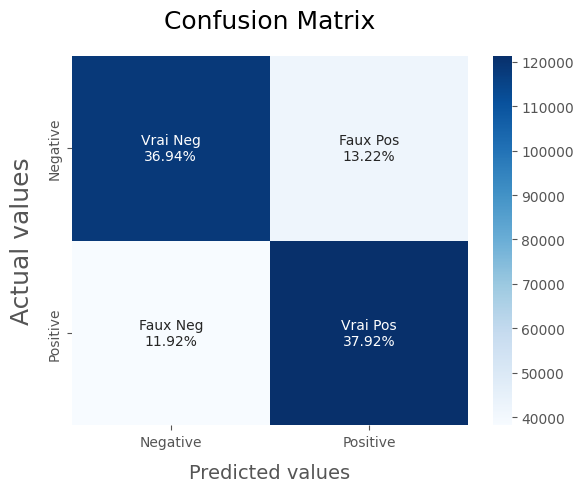

In [ ]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_val_tfidf)
print('naive bayes tfidf accuracy %s' % accuracy_score(y_pred_nb, y_val))


def model_Evaluation(model, X_val, y_val):
    # Predire les valeurs pour les donnees de validation
    y_pred = model.predict(X_val)

    # Afficher les metriques d'evaluation pour le dataset
    print(classification_report(y_val, y_pred))

    # Calculer et afficher la matrice de confusion
    cf_matrix = confusion_matrix(y_val, y_pred)

    categories = ['Negative', 'Positive']
    group_names = ['Vrai Neg', 'Faux Pos', 'Faux Neg', 'Vrai Pos']
    group_pourcentage = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_pourcentage)]
    labels = np.asarray(labels).reshape(2, 2)

    sns.heatmap(cf_matrix, annot=labels, cmap='Blues', fmt='', xticklabels=categories, yticklabels=categories)
    plt.xlabel("Predicted values", fontdict={'size': 14}, labelpad=10)
    plt.ylabel("Actual values", fontdict={'size': 18}, labelpad=10)
    plt.title("Confusion Matrix", fontdict={'size': 18}, pad=20)
    plt.show()

# Utilisation de la fonction pour évaluer le modèle Naive Bayes multinomial
model_Evaluation(nb, X_val_tfidf, y_val)

In [ ]:
nb = MultinomialNB()
nb.fit(X_train_count, y_train)
y_pred_nb = nb.predict(X_val_count)
print('naive bayes count accuracy %s' % accuracy_score(y_pred_nb, y_val))


def model_Evaluation(model, X_val, y_val):
    # Predire les valeurs pour les donnees de validation
    y_pred = model.predict(X_val)

    # Afficher les metriques d'evaluation pour le dataset
    print(classification_report(y_val, y_pred))

    # Calculer et afficher la matrice de confusion
    cf_matrix = confusion_matrix(y_val, y_pred)

    categories = ['Negative', 'Positive']
    group_names = ['Vrai Neg', 'Faux Pos', 'Faux Neg', 'Vrai Pos']
    group_pourcentage = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_pourcentage)]
    labels = np.asarray(labels).reshape(2, 2)

    sns.heatmap(cf_matrix, annot=labels, cmap='Blues', fmt='', xticklabels=categories, yticklabels=categories)
    plt.xlabel("Predicted values", fontdict={'size': 14}, labelpad=10)
    plt.ylabel("Actual values", fontdict={'size': 18}, labelpad=10)
    plt.title("Confusion Matrix", fontdict={'size': 18}, pad=20)
    plt.show()

# Utilisation de la fonction pour évaluer le modèle Naive Bayes multinomial
model_Evaluation(nb, X_val_count, y_val)

' nb = MultinomialNB()\nnb.fit(X_train_count, y_train)\ny_pred_nb = nb.predict(X_val_count)\nprint(\'naive bayes count accuracy %s\' % accuracy_score(y_pred_nb, y_val))\n\n\ndef model_Evaluation(model, X_val, y_val):\n    # Predire les valeurs pour les donnees de validation\n    y_pred = model.predict(X_val)\n\n    # Afficher les metriques d\'evaluation pour le dataset\n    print(classification_report(y_val, y_pred))\n\n    # Calculer et afficher la matrice de confusion\n    cf_matrix = confusion_matrix(y_val, y_pred)\n\n    categories = [\'Negative\', \'Positive\']\n    group_names = [\'Vrai Neg\', \'Faux Pos\', \'Faux Neg\', \'Vrai Pos\']\n    group_pourcentage = [\'{0:.2%}\'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]\n\n    labels = [f\'{v1}\n{v2}\' for v1, v2 in zip(group_names, group_pourcentage)]\n    labels = np.asarray(labels).reshape(2, 2)\n\n    sns.heatmap(cf_matrix, annot=labels, cmap=\'Blues\', fmt=\'\', xticklabels=categories, yticklabels=categori

<div class="alert alert-block alert-success">  
<h2><center><strong>Reseau neuronal Classique </strong></center></h2>   
</div>


In [ ]:
# Créer une classe personnalisée héritant de KerasClassifier
class CustomKerasClassifier(KerasClassifier, BaseEstimator):
    def __init__(self, neurons=64, dropout_rate=0.5, learning_rate=0.001, **kwargs):
        self.neurons = neurons
        self.dropout_rate = dropout_rate
        self.learning_rate = learning_rate
        super().__init__(**kwargs)

    # Fonction pour construire le modèle
    def _keras_build_fn(self):
        model = Sequential()
        model.add(Dense(self.neurons, input_shape=(X_train_tfidf.shape[1],), activation='relu'))
        model.add(Dropout(self.dropout_rate))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer=Adam(learning_rate=self.learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
        return model

# Définir la grille des hyperparamètres
param_grid = {
    'neurons': [32, 64, 128],
    'dropout_rate': [0.3, 0.5, 0.7],
    'learning_rate': [0.001, 0.01, 0.1],
}

# Créer une instance de la classe personnalisée
model = CustomKerasClassifier()

# Recherche sur grille avec validation croisée
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train_tfidf, y_train)

# Afficher les meilleurs résultats
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")


26667/26667 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - accuracy: 0.7430 - loss: 0.5150
13334/13334 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step
26667/26667 ━━━━━━━━━━━━━━━━━━━━ 88s 3ms/step - accuracy: 0.7432 - loss: 0.5146
13334/13334 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step
26667/26667 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - accuracy: 0.7431 - loss: 0.5145
13334/13334 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step
26667/26667 ━━━━━━━━━━━━━━━━━━━━ 112s 4ms/step - accuracy: 0.7454 - loss: 0.5114
13334/13334 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step
26667/26667 ━━━━━━━━━━━━━━━━━━━━ 130s 5ms/step - accuracy: 0.7456 - loss: 0.5112
13334/13334 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step
26667/26667 ━━━━━━━━━━━━━━━━━━━━ 120s 4ms/step - accuracy: 0.7451 - loss: 0.5112
13334/13334 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step
26667/26667 ━━━━━━━━━━━━━━━━━━━━ 168s 6ms/step - accuracy: 0.7464 - loss: 0.5097
13334/13334 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step
26667/26667 ━━━━━━━━━━━━━━━━━━━━ 166s 6ms/step - accuracy: 0.7461 - loss: 0.5092
13334/13334 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# Callback personnalisé pour afficher les informations d'entraînement par batch
class BatchLogger(tf.keras.callbacks.Callback):
    def on_train_batch_end(self, batch, logs=None):
        logs = logs or {}
        print(f"After batch {batch}, loss = {logs.get('loss')}, accuracy = {logs.get('accuracy')}")

# Extraire les meilleurs paramètres
best_params = grid_result.best_params_

# Créer un nouveau modèle avec les meilleurs paramètres
best_model = CustomKerasClassifier(
    neurons=best_params['neurons'],
    dropout_rate=best_params['dropout_rate'],
    learning_rate=best_params['learning_rate']
)

# Afficher un résumé du modèle
best_model._keras_build_fn().summary()

# Entraîner le modèle avec l'ensemble de données d'entraînement complet et afficher l'avancement par batch
batch_logger = BatchLogger()
best_model.fit(X_train_tfidf, y_train, callbacks=[batch_logger], epochs=10, batch_size=32)

# Maintenant, vous pouvez utiliser best_model pour faire des prédictions
predictions = best_model.predict(X_val_tfidf)

# Vous pouvez également évaluer le modèle
accuracy = best_model.score(X_val_tfidf, y_val)
print(f'Accuracy: {accuracy}')

Model: "sequential_168"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_504 (Dense)               │ (None, 128)            │       266,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_168 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_505 (Dense)               │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_506 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 270,401 (1.03 MB)

 Trainable params: 270,401 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 318s 8ms/step - accuracy: 0.7501 - loss: 0.5038
Epoch 2/10
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 272s 7ms/step - accuracy: 0.7724 - loss: 0.4744
Epoch 3/10
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 275s 7ms/step - accuracy: 0.7787 - loss: 0.4663
Epoch 4/10
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 279s 7ms/step - accuracy: 0.7832 - loss: 0.4600
Epoch 5/10
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 304s 8ms/step - accuracy: 0.7862 - loss: 0.4560
Epoch 6/10
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 272s 7ms/step - accuracy: 0.7879 - loss: 0.4534
Epoch 7/10
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 259s 6ms/step - accuracy: 0.7906 - loss: 0.4499
Epoch 8/10
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 217s 5ms/step - accuracy: 0.7923 - loss: 0.4469
Epoch 9/10
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 202s 5ms/step - accuracy: 0.7930 - loss: 0.4456
Epoch 10/10
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 200s 5ms/step - accuracy: 0.7946 - loss: 0.4438
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 

<div class="alert alert-block alert-success">  
<h2><center><strong>LSTM (RNN) 🧪</strong></center></h2>   
</div>

<h4> Étape 1</h4>
- L'entrée du modèle comprend 500 mots car ce sont les caractéristiques/mots que nous avons extraites ci-dessus à partir du texte des tweets.

<h4> Étape 2</h4>
- Les embeddings fournissent la présentation des mots et de leurs significations relatives. Par exemple, ici, nous spécifions le nombre maximal de mots, la longueur des mots d'entrée et les entrées de la couche précédente.

<h4> Étape 3</h4>
- LSTM (mémoire à court terme à long terme) sauvegarde les mots et prédit les mots suivants en fonction des mots précédents. LSTM est un prédicteur de séquence des mots à venir.

<img src="https://static.wixstatic.com/media/3eee0b_969c1d3e8d7943f0bd693d6151199f69~mv2.gif">

<h4> Étape 4</h4>
- La couche Dense réduit les sorties en obtenant les entrées de la couche Flatten. La couche Dense utilise toutes les entrées des neurones de la couche précédente, effectue des calculs et envoie 256 sorties.

<h4> Étape 5</h4>
- La fonction d'activation est un nœud placé à la fin de toutes les couches du modèle de réseau neuronal ou entre les couches du réseau neuronal. La fonction d'activation aide à décider quel neurone doit être activé et quel neurone doit être désactivé. Ainsi, la fonction d'activation du nœud définit la sortie de ce nœud en fonction d'une entrée ou d'un ensemble d'entrées.

<img src="https://miro.medium.com/v2/resize:fit:1400/1*mcJfRvd9zarAbkHppFRrCQ.gif">

<h4> Étape 6</h4>
- La couche de Dropout élimine certains neurones des couches précédentes. Pourquoi appliquons-nous cela ? Nous appliquons cela pour éviter les problèmes de surapprentissage. En surapprentissage, le modèle donne une bonne précision lors de l'apprentissage, mais pas lors du test.
<img src="https://i.imgur.com/a86utxY.gif">

In [ ]:
#l'entrainement du modele est couteux en terme de temps et machine donc pas comme les autres modeles, on prend qu'une part du dataset
data_pos = data[data['label'] == 1]
data_neg = data[data['label'] == 0]

data_pos = data_pos.iloc[:int(400000)]
data_neg = data_neg.iloc[:int(400000)]

#Maintenant on combine les deux categories des tweets
data = pd.concat([data_pos, data_neg])
print(len(data))
data.head(5)

800000


,text,label
799999,i love u guys r the best,1
800000,im meeting up with one of my besties tonight c...,1
800001,thanks for the twitter add sunisa i got to me...,1
800002,being sick can be really cheap when it hurts t...,1
800003,he has that effect on everyone,1


In [ ]:
X = data.text
y = data.label

In [ ]:
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
sequences_matrix.shape

(800000, 500)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.2, random_state=2)

In [ ]:
def tensorflow_based_model(): # Définition de la fonction tensorflow_based_model pour l'entraînement du modèle basé sur TensorFlow
    inputs = Input(name='inputs',shape=[max_len]) # étape 1
    layer = Embedding(2000,50,input_length=max_len)(inputs) # étape 2
    layer = LSTM(64)(layer) # étape 3
    layer = Dense(256,name='FC1')(layer) # étape 4
    layer = Activation('relu')(layer) # étape 5
    layer = Dropout(0.5)(layer) # étape 6
    layer = Dense(1,name='out_layer')(layer) # étape 4 à nouveau, mais cette fois-ci il ne donne qu'une seule sortie car nous devons classer le tweet comme positif ou négatif
    layer = Activation('sigmoid')(layer) # étape 5 mais cette fois-ci la fonction d'activation est sigmoid pour une seule sortie.
    model = Model(inputs=inputs,outputs=layer) # ici nous obtenons la valeur de sortie finale dans le modèle pour la classification
    return model 

In [ ]:
model = tensorflow_based_model() 
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy']) 

In [ ]:
history=model.fit(X_train,Y_train,batch_size=80,epochs=6, validation_split=0.2)# l'entrainement commencee
print('Entrainement termineee !!')

Epoch 1/6
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 2653s 414ms/step - accuracy: 0.7294 - loss: 0.5295 - val_accuracy: 0.7651 - val_loss: 0.4843
Epoch 2/6
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 2728s 426ms/step - accuracy: 0.7648 - loss: 0.4852 - val_accuracy: 0.7675 - val_loss: 0.4794
Epoch 3/6
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 2682s 419ms/step - accuracy: 0.7697 - loss: 0.4782 - val_accuracy: 0.7690 - val_loss: 0.4799
Epoch 4/6
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 2612s 408ms/step - accuracy: 0.7724 - loss: 0.4735 - val_accuracy: 0.7695 - val_loss: 0.4762
Epoch 5/6
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 2658s 415ms/step - accuracy: 0.7767 - loss: 0.4687 - val_accuracy: 0.7711 - val_loss: 0.4749
Epoch 6/6
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 3928s 614ms/step - accuracy: 0.7771 - loss: 0.4681 - val_accuracy: 0.7716 - val_loss: 0.4753
Entrainement termineee !!


In [ ]:
accr1 = model.evaluate(X_test,Y_test) #test du modele
print('Test set\n  Accuracy: {:0.2f}'.format(accr1[1])) 

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 569s 113ms/step - accuracy: 0.7724 - loss: 0.4764
Test set
  Accuracy: 0.77


In [ ]:
y_pred = model.predict(X_test) #avoir les predictions du modele entrainé
y_pred = (y_pred > 0.5)

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 483s 97ms/step




confusion matrix


[[61489 18765]
 [17683 62063]]




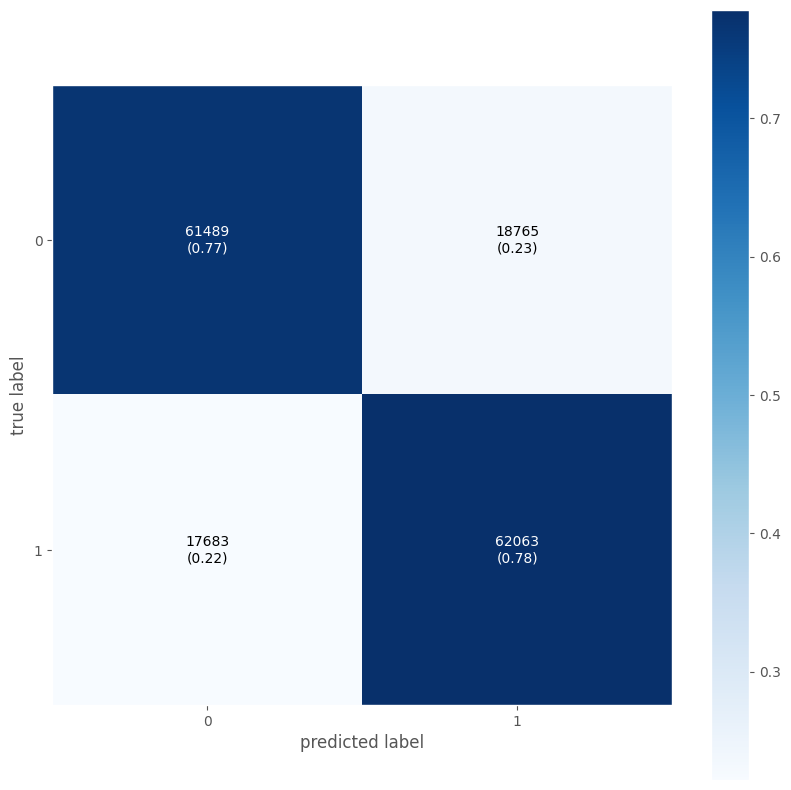

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(Y_test, y_pred)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

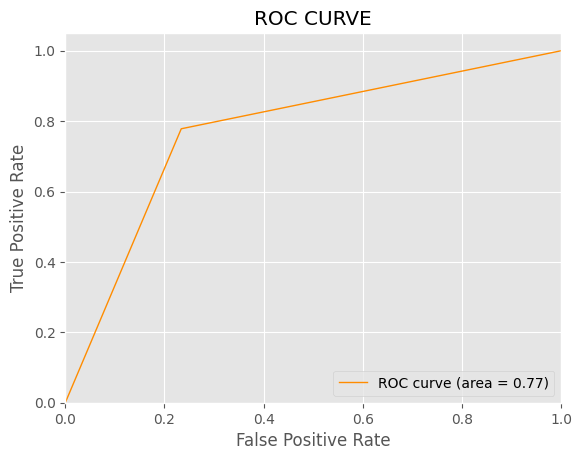

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

<div class="alert alert-block alert-success">  
<h2><center><strong>MERCI POUR LA LECTURE</strong></center></h2>   
</div>